In [1]:
# !pip install --break-system-packages hdbscan 
# !pip install --upgrade joblib --break-system-packages


### 클러스터링 기법 설명

1. **K-Means 클러스터링**  
   - 데이터를 K개의 그룹으로 나누는 군집 알고리즘  
   - 각 클러스터의 중심(centroid)을 기준으로 데이터를 배정  
   - 군집 중심을 반복적으로 조정하여 최적의 분류를 수행  
   - 장점: 빠르고 효율적, 데이터가 균등하게 분포하면 효과적  
   - 단점: 클러스터 개수(K)를 사전에 정해야 함, 이상치에 민감함  

2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**  
   - 밀도 기반 군집화 기법  
   - 일정 거리(eps) 내에 특정 개수(min_samples) 이상의 데이터가 있으면 같은 군집으로 묶음  
   - 이상치(outlier)를 따로 분류할 수 있음  
   - 장점: 클러스터 개수를 정할 필요 없음, 다양한 형태의 클러스터를 찾을 수 있음  
   - 단점: 파라미터(eps, min_samples) 설정이 중요, 밀도 차이가 큰 데이터에서는 성능 저하  

---

### 해석 방법

1. **K-Means 결과 해석**
   - `KMeans_Cluster` 컬럼을 보면 각 데이터가 어느 클러스터에 속하는지 확인 가능  
   - 시각화 결과에서 색깔이 다른 그룹이 형성되었는지 확인  
   - 같은 그룹 내 데이터들이 유사한 경사각과 거리 특성을 가지는지 분석  

2. **DBSCAN 결과 해석**
   - `DBSCAN_Cluster` 컬럼에서 `-1`은 이상치(outlier)를 의미  
   - 군집이 형성된 경우, 클러스터 내 데이터들이 밀집되어 있는지 확인  
   - K-Means와 비교하여 데이터의 구조적 차이를 파악  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import platform
import matplotlib

# 한글 폰트 설정
if platform.system() == 'Darwin':  # macOS
    matplotlib.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

In [3]:
url = "./data/원본_통합_데이터.csv"
file_encoding = "UTF-8"

In [4]:
get_data = pd.read_csv(url, encoding=file_encoding)

In [5]:
get_data.columns

Index(['중점_위도', '중점_경도', '경사각', '최근접_시설의_평균거리', '열선여부', '원본여부'], dtype='object')

In [6]:
get_data.head()

,중점_위도,중점_경도,경사각,최근접_시설의_평균거리,열선여부,원본여부
0,37.590543,126.993313,11.724227,219.445340,1.0,1
1,37.613411,126.977763,5.044559,642.349704,1.0,1
2,37.611366,126.975317,7.859327,420.360320,1.0,1
3,37.605400,126.957447,10.043141,207.818466,1.0,1
4,37.583314,126.987147,1.226563,250.589899,1.0,1


In [7]:
# 데이터 로드 (예제 데이터프레임 생성)
data = get_data[["중점_위도", "중점_경도", "경사각", "최근접_시설의_평균거리", "열선여부"]]

df = pd.DataFrame(data)

In [8]:
# 특징 추출 및 정규화
features = df[['경사각', '최근접_시설의_평균거리']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# K-Means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

In [10]:
# DBSCAN 클러스터링
dbscan = DBSCAN(eps=1.0, min_samples=2)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

In [11]:
# 결과 출력
print(df)

          중점_위도       중점_경도        경사각  최근접_시설의_평균거리  열선여부  KMeans_Cluster  \
0     37.590543  126.993313  11.724227    219.445340   1.0               0   
1     37.613411  126.977763   5.044559    642.349704   1.0               1   
2     37.611366  126.975317   7.859327    420.360320   1.0               0   
3     37.605400  126.957447  10.043141    207.818466   1.0               0   
4     37.583314  126.987147   1.226563    250.589899   1.0               1   
...         ...         ...        ...           ...   ...             ...   
6712  37.547626  127.068035   0.668269    288.914641   0.0               1   
6713  37.547715  127.068096   0.194718    290.090070   0.0               1   
6714  37.547715  127.068096   0.194718    290.090070   0.0               1   
6715  37.547986  127.068155   0.209493    296.652262   0.0               1   
6716  37.547718  127.068055   0.037329    291.052729   0.0               1   

      DBSCAN_Cluster  
0                  0  
1                

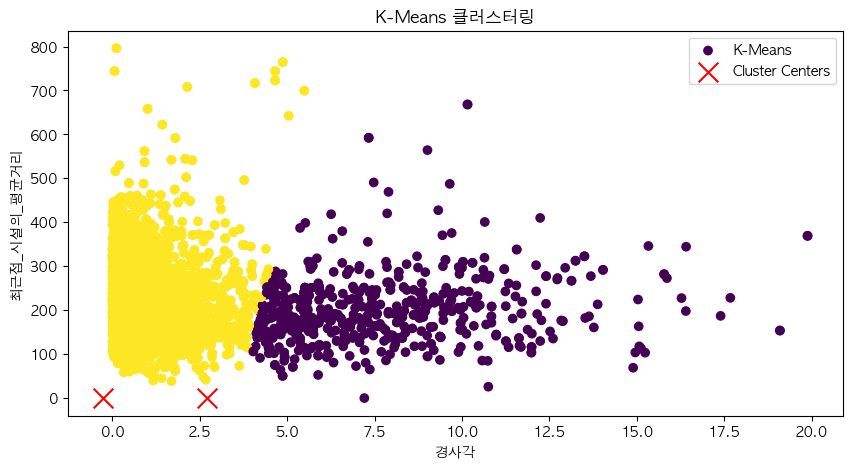

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(df['경사각'], df['최근접_시설의_평균거리'], c=df['KMeans_Cluster'], cmap='viridis', label='K-Means')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
plt.xlabel('경사각')
plt.ylabel('최근접_시설의_평균거리')
plt.title('K-Means 클러스터링')
plt.legend()
plt.show()

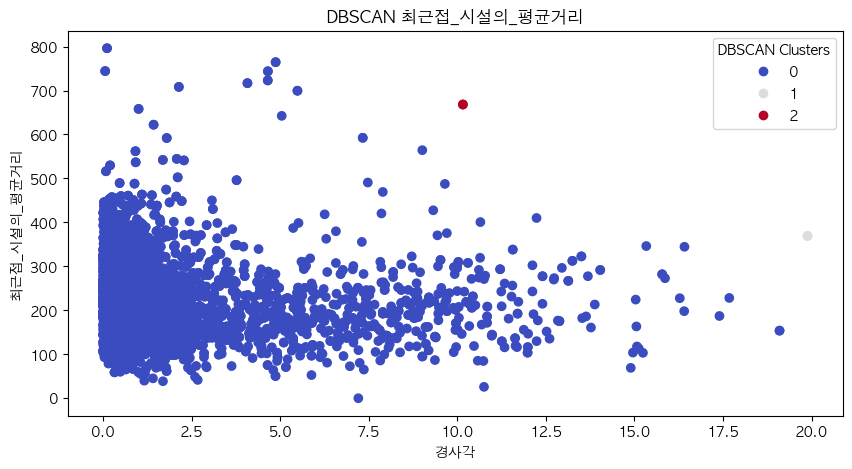

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
scatter = plt.scatter(df['경사각'], df['최근접_시설의_평균거리'], c=df['DBSCAN_Cluster'], cmap='coolwarm')
plt.xlabel('경사각')
plt.ylabel('최근접_시설의_평균거리')
plt.title('DBSCAN 최근접_시설의_평균거리')
plt.legend(*scatter.legend_elements(), title="DBSCAN Clusters")
plt.show()

In [14]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 클러스터링 알고리즘 목록
clustering_algorithms = ['KMeans', 'DBSCAN']
scores = {}

# 진행 상황 표시
for algorithm in tqdm(clustering_algorithms, desc="Evaluating models"):
    if algorithm == 'KMeans':
        labels = df['KMeans_Cluster']
        silhouette = silhouette_score(scaled_features, labels)
        davies_bouldin = davies_bouldin_score(scaled_features, labels)
    elif algorithm == 'DBSCAN':
        labels = df['DBSCAN_Cluster']
        if len(set(labels)) > 1:
            silhouette = silhouette_score(scaled_features, labels)
            davies_bouldin = davies_bouldin_score(scaled_features, labels)
        else:
            silhouette = "Not enough clusters"
            davies_bouldin = "Not enough clusters"

    # 결과 저장
    scores[algorithm] = {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": davies_bouldin
    }

# 결과 출력
for algorithm, score in scores.items():
    print(f"{algorithm} Silhouette Score: {score['Silhouette Score']}")
    print(f"{algorithm} Davies-Bouldin Index: {score['Davies-Bouldin Index']}")


Evaluating models: 100%|██████████████████████████| 2/2 [00:00<00:00,  3.20it/s]

KMeans Silhouette Score: 0.6058453512806112
KMeans Davies-Bouldin Index: 0.7320307899140693
DBSCAN Silhouette Score: 0.7439995229955512
DBSCAN Davies-Bouldin Index: 0.15942032555406638


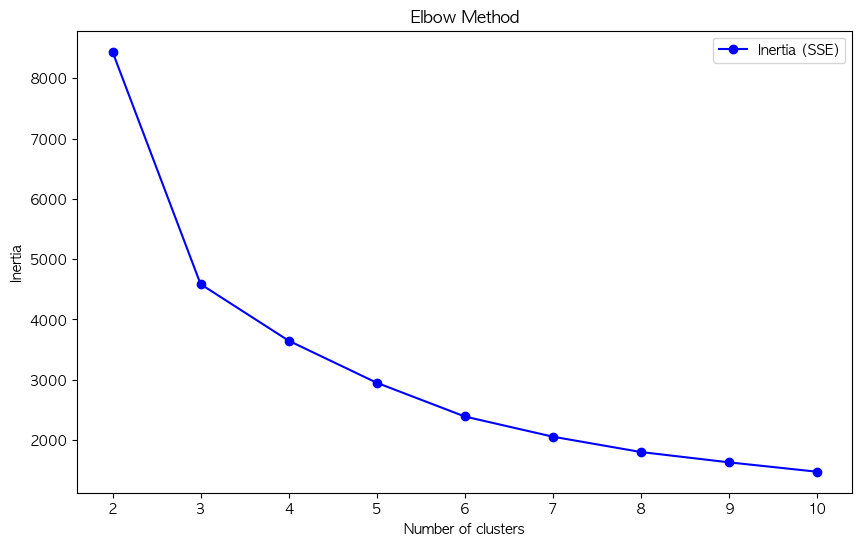

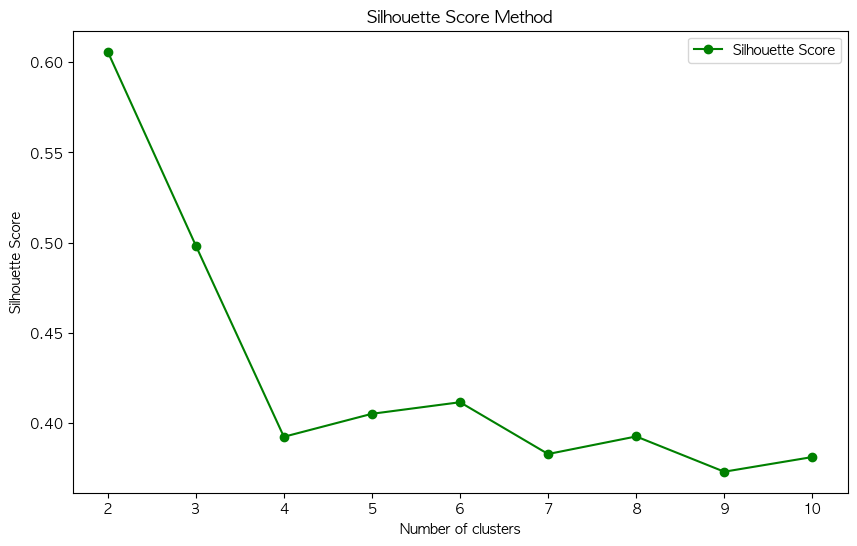

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 엘보우 방법을 사용해 최적의 클러스터 개수 찾기
inertia = []  # 클러스터의 응집도
silhouette_scores = []  # 실루엣 점수

# 여러 개의 클러스터 개수에 대해 평가
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# 엘보우 방법 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', color='blue', label='Inertia (SSE)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.show()

# 실루엣 점수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.legend()
plt.show()

# 최적의 클러스터 개수는 실루엣 점수가 최대인 곳이나, 엘보우 차트에서 급격히 기울기가 완만해지는 지점으로 선택할 수 있음


## DBSCAN 파라미터 튜닝 코드 설명

이 코드는 **DBSCAN** 클러스터링 알고리즘의 **`eps`**와 **`min_samples`** 하이퍼파라미터 값을 튜닝하여 **최적의 실루엣 점수(Silhouette Score)**를 찾는 작업을 수행한다. **`tqdm`** 라이브러리를 사용해 진행 상황을 시각적으로 표시하고 있다.

### 1. **파라미터 범위 설정**
   - **`eps_values`**: DBSCAN에서 클러스터링을 정의할 때, 점들 간의 최대 거리(`eps`)를 설정한다. 이 값은 0.1부터 2.0까지 0.1 간격으로 설정했다.
   - **`min_samples_values`**: DBSCAN에서 **`min_samples`**는 각 클러스터의 최소 샘플 수를 지정한다. 이 값은 2에서 9까지 설정했다.

### 2. **실루엣 점수 계산**
   - **실루엣 점수**는 클러스터링 결과가 얼마나 잘 나뉘었는지를 측정하는 지표다. 클러스터가 잘 분리될수록 실루엣 점수는 높아진다. 
   - **`silhouette_score`** 함수는 클러스터링된 데이터를 입력받아 실루엣 점수를 계산한다. 
   - **`DBSCAN`**으로 클러스터링을 수행한 후, 각 클러스터의 실루엣 점수를 계산한다.

### 3. **DBSCAN 클러스터링**
   - **DBSCAN(eps=eps, min_samples=min_samples)**: `eps`와 `min_samples` 파라미터에 대해 가능한 모든 조합을 시도하며 DBSCAN 알고리즘을 실행한다. 
   - `dbscan.fit_predict(scaled_features)`는 주어진 데이터를 클러스터링하고 각 데이터 포인트의 레이블을 반환한다.

### 4. **진행 표시줄과 `tqdm` 사용**
   - `tqdm` 라이브러리를 활용하여 **`eps`** 값에 대해 진행 상황을 시각적으로 표시한다. 이때 **`bar_format`** 옵션을 사용해 출력 포맷을 조정하고, 각 단계별로 진행 시간과 남은 시간을 밀리초까지 표시한다.

### 5. **최고 실루엣 점수와 최적 파라미터 찾기**
   - 각 **`eps`**와 **`min_samples`** 조합에 대해 실루엣 점수를 계산하고, 최고 실루엣 점수를 기록한다. 
   - **`best_score`**가 가장 높은 값일 때 해당 **`eps`**와 **`min_samples`**를 **`best_eps`**, **`best_min_samples`** 변수에 저장한다.

### 6. **결과 출력**
   - 모든 파라미터 조합에 대해 실루엣 점수를 계산한 후, 최종적으로 최적의 **`eps`**, **`min_samples`**, 그리고 해당 실루엣 점수를 출력한다.
   
   **최종 출력**:
   ```python
   print(f"최적의 eps: {best_eps}")
   print(f"최적의 min_samples: {best_min_samples}")
   print(f"최고 실루엣 점수: {best_score}")


In [16]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from joblib import Parallel, delayed, parallel_backend
from tqdm import tqdm
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd

# 데이터 스케일링
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scaled_features)  # features는 원본 데이터

# DBSCAN 파라미터 범위 설정
eps_values = np.arange(0.05, 1.5, 0.05) 
min_samples_values = range(2, 10) 

# 실루엣 점수 계산을 위한 함수
def evaluate_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(scaled_features)
    if len(set(dbscan_labels)) > 1:
        return silhouette_score(scaled_features, dbscan_labels)
    return -1

# DBSCAN 최적화 (병렬을 최소화한 형태)
def dbscan_worker(eps, min_samples, pbar):
    score = evaluate_dbscan(eps, min_samples)
    pbar.set_postfix({'eps': eps, 'min_samples': min_samples, 'score': score})  # 실시간 점수 업데이트
    pbar.update(1)  # 진행 상태 업데이트
    return eps, min_samples, score

# 병렬 처리 시 threading 백엔드 사용
n_jobs = -1  # 모든 CPU 코어 사용
with parallel_backend('threading', n_jobs=n_jobs):  # threading 백엔드로 변경
    with tqdm(total=len(eps_values) * len(min_samples_values), desc="DBSCAN 최적화 진행 중") as pbar:
        results_dbscan = Parallel()(
            delayed(dbscan_worker)(eps, min_samples, pbar)
            for eps in eps_values
            for min_samples in min_samples_values
        )

# DBSCAN 결과 중 최적의 파라미터 찾기
best_score_dbscan = max([score for _, _, score in results_dbscan])
best_eps, best_min_samples = np.unravel_index(np.argmax([score for _, _, score in results_dbscan]), (len(eps_values), len(min_samples_values)))

print("최적 DBSCAN 파라미터:")
print(f"eps: {eps_values[best_eps]}")
print(f"min_samples: {min_samples_values[best_min_samples]}")
print(f"최고 실루엣 점수: {best_score_dbscan}")


DBSCAN 최적화 진행 중: 100%|█| 232/232 [00:33<00:00,  6.97it/s, eps=1.45, min_sa

최적 DBSCAN 파라미터:
eps: 0.15000000000000002
min_samples: 2
최고 실루엣 점수: 0.8033265668056765


## DBSCAN 최적 파라미터 튜닝 결과 

**최적의 `eps`**: 1.5000000000000001  
**최적의 `min_samples`**: 2  
**최고 실루엣 점수**: 0.8026039857207263  

### 해석:
- **`eps` (1.5)**: 클러스터를 형성할 수 있는 최대 거리로, 1.4로 설정했을 때 가장 높은 실루엣 점수를 얻을 수 있었다.
- **`min_samples` (2)**: 각 클러스터가 최소로 가져야 하는 샘플 수로, 2로 설정했을 때 클러스터링 성능이 가장 좋았다.
- **실루엣 점수 (0.802)**: 이 값은 클러스터 간의 분리 정도를 나타내며, 0.79는 상당히 좋은 성능을 나타낸다. 즉, 클러스터링이 잘 되어 있다는 의미이다.

따라서, **`eps=1.5`**와 **`min_samples=2`**는 이 데이터에 대해 **최적의 DBSCAN 파라미터**로 설정되며, **클러스터링 성능이 가장 우수한 설정**임을 알 수 있다.


## 결과 예측하고 분석

In [17]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

# 최적의 파라미터
best_eps = 1.5
best_min_samples = 2

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(scaled_features)

# 결과를 데이터프레임에 추가
df['DBSCAN_Labels'] = dbscan_labels

# 클러스터에 속한 데이터(노이즈는 제외)
clustered_df = df[df['DBSCAN_Labels'] != -1]

# 예측 조건: 경사각이 10도 이상이고, 최근접 시설의 거리가 500m 이하인 구간을 설치 필요로 설정
clustered_df['예측'] = np.where((clustered_df['경사각'] >= 10) & (clustered_df['최근접_시설의_평균거리'] <= 500), 1, 0)

# 전체 데이터프레임에 예측 컬럼 추가
df['예측'] = df.index.map(clustered_df.set_index(df.index)['예측']).fillna(0).astype(int) 


In [18]:
df

,중점_위도,중점_경도,경사각,최근접_시설의_평균거리,열선여부,KMeans_Cluster,DBSCAN_Cluster,DBSCAN_Labels,예측
0,37.590543,126.993313,11.724227,219.445340,1.0,0,0,0,1
1,37.613411,126.977763,5.044559,642.349704,1.0,1,0,0,0
2,37.611366,126.975317,7.859327,420.360320,1.0,0,0,0,0
3,37.605400,126.957447,10.043141,207.818466,1.0,0,0,0,1
4,37.583314,126.987147,1.226563,250.589899,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
6712,37.547626,127.068035,0.668269,288.914641,0.0,1,0,0,0
6713,37.547715,127.068096,0.194718,290.090070,0.0,1,0,0,0
6714,37.547715,127.068096,0.194718,290.090070,0.0,1,0,0,0
6715,37.547986,127.068155,0.209493,296.652262,0.0,1,0,0,0


In [19]:
filter_data = df[df['예측'] == 1]
result_df = filter_data[filter_data["열선여부"] == 0] 

In [20]:
result_df = result_df[["중점_위도", "중점_경도"]]

In [21]:
len(result_df)

56

In [22]:

# 중복값 제거 (위경도 값이 동일한 경우) 
result_df = result_df.drop_duplicates(subset=["중점_위도", "중점_경도"], keep='first')

In [23]:
len(result_df)

28

In [24]:
result_df.reset_index(drop=True)

,중점_위도,중점_경도
0,37.560107,127.095052
1,37.570070,127.088228
2,37.567252,127.089527
3,37.567705,127.089245
4,37.568667,127.087470
5,37.570814,127.087008
6,37.567271,127.087068
7,37.563679,127.088302
8,37.567831,127.088524
9,37.562790,127.088073


In [25]:
try :
    save_url = './make_file/DBSCAN_결과.csv'
    result_df.to_csv(save_url, encoding=file_encoding, index=False)
    print(f"{save_url} 저장 완료.")
except OSError as e:
    print(e)

./make_file/DBSCAN_결과.csv 저장 완료.
